# NF1

<!-- Provide a brief overview of the syndrome and its genetic basis. Replace [Gene Name] and [Syndrome Name] with the specific gene and syndrome you are studying. -->

[Neurofibromatosis type 1]((https://omim.org/entry/162200)) is an autosomal dominant disorder characterized by cafe-au-lait spots, Lisch nodules, and fibromatous tumors of the skin. The syndrome is caused by pathogenic variants in the [NF1 gene](https://omim.org/entry/162200).


Several previous publications have reported candidate genotype-phenotype correlations in NF1.


[Rojnueangnit et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26178382/) reported five distinct missense variants affecting p.Arg1809. 

> Patients presented with multiple café-au-lait macules (CALM) with or without freckling and Lisch nodules, but no externally visible plexiform neurofibromas or clear cutaneous neurofibromas were found.

[Upadhyaya et al. (2007)](https://pubmed.ncbi.nlm.nih.gov/17160901/) stated that:

> We identified 21 unrelated probands with NF1 (14 familial and 7 sporadic cases) who were all found to have the same c.2970-2972 delAAT (p.990delM) mutation but no cutaneous neurofibromas or clinically obvious plexiform neurofibromas. 

[Pasmant et al. (2010)](https://pubmed.ncbi.nlm.nih.gov/20513137/) report:

> Genotype-phenotype correlations were studied in 58 of these microdeletion patients and compared to 389 patients with intragenic truncating NF1 mutations and phenotyped in the same standardized way. Our results confirmed in an unbiased manner the existence of a contiguous gene syndrome with a significantly higher incidence of learning disabilities and facial dysmorphism in microdeleted patients compared to patients with intragenic NF1 mutations. Microdeleted NF1 patients also showed a trend toward significance for childhood overgrowth. 


## Imports 

In [30]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")


Loaded HPO v2023-10-09
Using genophenocorr version 0.5.1.dev0


# NF1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for NF1.

In [31]:
gene_symbol = 'NF1'
mane_tx_id = 'NM_001042492.3'
mane_protein_id = "NP_001035957.1"

## Loading Phenopackets & Gene Variant Data
The prefered transcript can be found by searching on the gene symbol in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/). By entering the accession number in [NCBI Nucleotide](https://www.ncbi.nlm.nih.gov/nuccore/?), you can find the corresponding protein accession number.

In [32]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.20") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
len(phenopackets)


cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 419/419 [01:12<00:00,  5.76individuals/s]
Validated under permissive policy
No errors or warnings were found


## Define Configuration & Run Analysis

In [33]:
from gpsea.view import CohortViewable
cv = CohortViewable(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Multiple cafe-au-lait spots,HP:0007565,294
Freckling,HP:0001480,146
Axillary freckling,HP:0000997,125
Inguinal freckling,HP:0030052,92
Lisch nodules,HP:0009737,83
Neurofibroma,HP:0001067,80
Plexiform neurofibroma,HP:0009732,68
Scoliosis,HP:0002650,56
Few cafe-au-lait spots,HP:0007429,48
Optic nerve glioma,HP:0009734,39


<Axes: title={'center': 'Neurofibromin\ntranscript: NM_001042492.3, protein: NP_001035957.1'}>

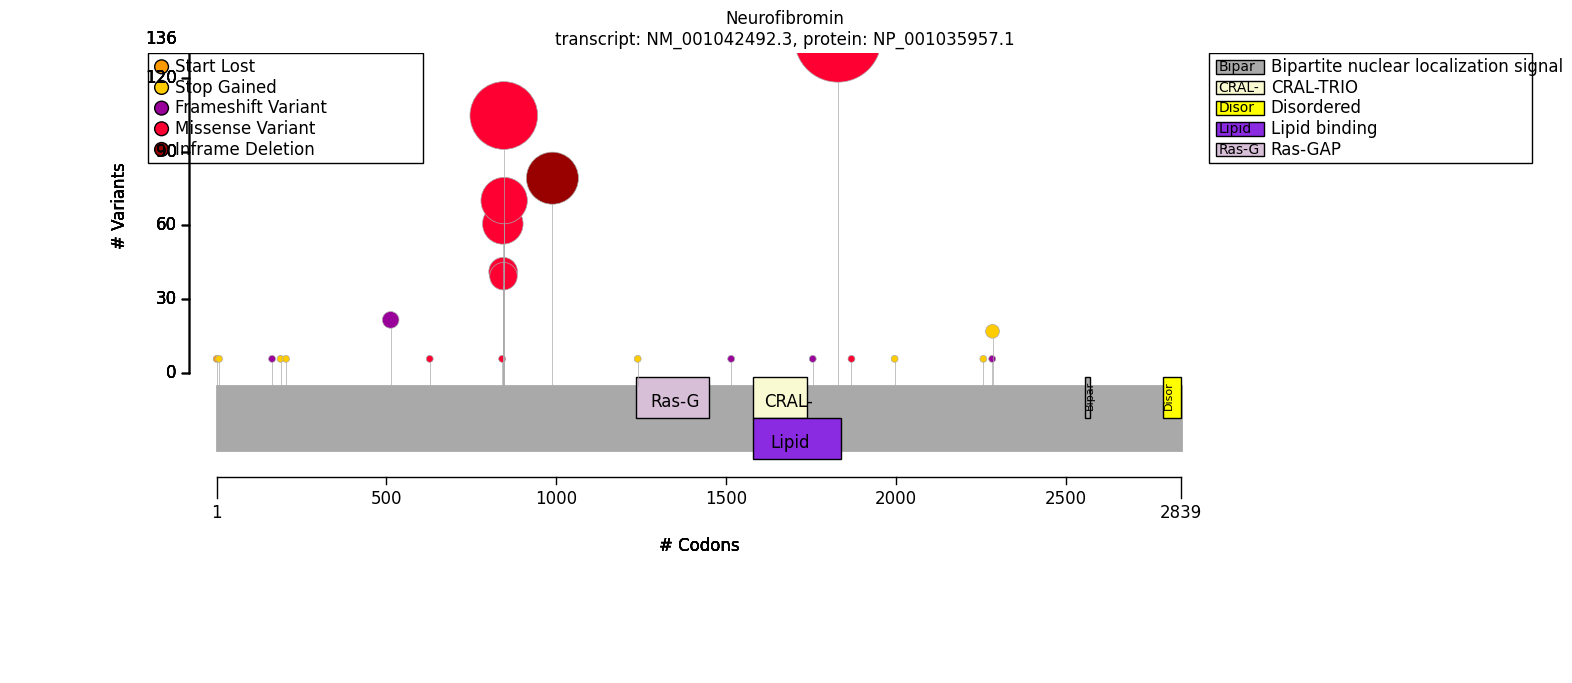

In [34]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService, configure_default_protein_metadata_service

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id) 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizable, ProteinVisualizer

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [35]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort)

Name,Type,Coordinates,Count,Variants
Ras-GAP,DOMAIN,1235 - 1451,1,p.Arg1241Ter
CRAL-TRIO,DOMAIN,1580 - 1738,0,
Lipid binding,REGION,1580 - 1837,137,p.Arg1830Ser; p.Lys1756SerfsTer25; p.Arg1830Cys; p.Arg1830Gly; p.Arg1830Pro; p.Arg1830Leu
Bipartite nuclear localization signal,MOTIF,2555 - 2571,0,
Disordered,REGION,2787 - 2839,0,


In [36]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Variant key,Variant (cDNA),Variant (protein),Overlapping Exons,Effects,Count
17_31327718_31327718_C_T,c.5488C>T,p.Arg1830Cys,38,missense,107
17_31229155_31229155_T_C,c.2540T>C,p.Leu847Pro,21,missense,71
SO:1000029_HGNC:7765_NF1,SV involving NF1,p.?,,chromosomal deletion,61
17_31229953_31229956_CAAT_C,c.2970_2972del,p.Met992del,22,inframe deletion,44
17_31327719_31327719_G_T,c.5489G>T,p.Arg1830Leu,38,missense,18
17_31229157_31229157_G_C,c.2542G>C,p.Gly848Arg,21,missense,17
17_31229145_31229145_C_T,c.2530C>T,p.Leu844Phe,21,missense,11
17_31229158_31229158_G_A,c.2543G>A,p.Gly848Glu,21,missense,11
17_31229155_31229155_T_G,c.2540T>G,p.Leu847Arg,21,missense,8
17_31229149_31229149_G_A,c.2534G>A,p.Cys845Tyr,21,missense,7


## Correlation Analysis

In [37]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
    missing_implies_excluded=False,
    min_n_of_patients_with_term=2,
)
len(pheno_predicates)
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(
    hpo=hpo,
    term_frequency_threshold=0.4,
)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
from gpsea.analysis.pcats.stats import FisherExactTest

count_statistic = FisherExactTest()
from gpsea.analysis.pcats import HpoTermAnalysis

analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
     mtc_alpha=mtc_alpha,
)


[Rojnueangnit et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26178382/) reported five distinct missense variants affecting p.Arg1809. 

> Patients presented with multiple café-au-lait macules (CALM) with or without freckling and Lisch nodules, but no externally visible plexiform neurofibromas or clear cutaneous neurofibromas were found.

Note that [Rojnueangnit et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26178382/) report these variants at position p.Arg1809, but
using the current MANE transcript, they are at position 1830, e.g., [NM_001042492.3(NF1):c.5488C>G (p.Arg1830Gly)](https://www.ncbi.nlm.nih.gov/clinvar/variation/208857/).


- 17_31327718_31327718_C_T	c.5488C>T	p.Arg1830Cys
- 17_31327719_31327719_G_T	c.5489G>T	p.Arg1830Leu
- 17_31327719_31327719_G_C	c.5489G>C	p.Arg1830Pro
- 17_31327718_31327718_C_G	c.5488C>G	p.Arg1830Gly
- 17_31327718_31327718_C_A	c.5488C>A	p.Arg1830Ser

In [38]:
from gpsea.model import FeatureType, VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

r1830c = VariantPredicates.variant_key(key="17_31327718_31327718_C_T") # c.5488C>T	p.Arg1830Cys
r1830l = VariantPredicates.variant_key(key="17_31327719_31327719_G_T") # c.5489G>T	p.Arg1830Leu
r1830p = VariantPredicates.variant_key(key="17_31327719_31327719_G_C") # c.5489G>C	p.Arg1830Pro
r1830g = VariantPredicates.variant_key(key="17_31327718_31327718_C_G") # c.5488C>G	p.Arg1830Gly
r1830s = VariantPredicates.variant_key(key="17_31327718_31327718_C_A") # c.5488C>A	p.Arg1830Ser

is_aa_1830 = r1830c | r1830l | r1830p | r1830g | r1830s

is_aa_1830_predicate = monoallelic_predicate(a_predicate=is_aa_1830,
                                     b_predicate=~is_aa_1830,
                                     names=("p.Arg1830", "other")
)
print(is_aa_1830_predicate.display_question())
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=is_aa_1830_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(result)

Allele group: p.Arg1830, other


Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,28
HMF03,Skipping term because of a child term with the same individual counts,7
HMF08,Skipping general term,34
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.25,44


In [39]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=result)

Allele group                                       p.Arg1830            other  \
                                                       Count Percent    Count   
Freckling [HP:0001480]                                76/133     57%  201/222   
Inguinal freckling [HP:0030052]                         8/79     10%   84/170   
Axillary freckling [HP:0000997]                        20/79     25%  105/175   
Astrocytoma [HP:0009592]                               1/136      1%      2/2   
Neurofibroma [HP:0001067]                                5/8     62%  153/162   
Multiple cafe-au-lait spots [HP:0007565]             121/136     89%  173/203   
Abnormality of skin pigmentation [HP:0001000]        136/136    100%  255/255   
Cafe-au-lait spot [HP:0000957]                       134/134    100%  195/195   
Neoplasm of the peripheral nervous system [HP:0...       5/5    100%  153/153   
Neoplasm of the nervous system [HP:0004375]              6/6    100%  169/169   
Neoplasm by anatomical site [HP:0011793]               17/17    100%  181/181   
Fibroma [HP:0010614]                                     5/5    100%  153/153   
Soft tissue sarcoma [HP:0030448]                         5/5    100%  154/154   
Neoplasm by histology [HP:0011792]                     17/17    100%  176/176   
Neoplasm of the skin [HP:0008069]                        5/5    100%  153/153   

Allele group                                                                   \
                                                   Percent Corrected p values   
Freckling [HP:0001480]                                 91%       9.425816e-12   
Inguinal freckling [HP:0030052]                        49%       3.642696e-09   
Axillary freckling [HP:0000997]                        60%       1.830906e-06   
Astrocytoma [HP:0009592]                              100%       1.190098e-03   
Neurofibroma [HP:0001067]                              94%       3.735077e-02   
Multiple cafe-au-lait spots [HP:0007565]               85%       8.336939e-01   
Abnormality of skin pigmentation [HP:0001000]         100%       1.000000e+00   
Cafe-au-lait spot [HP:0000957]                        100%       1.000000e+00   
Neoplasm of the peripheral nervous system [HP:0...    100%       1.000000e+00   
Neoplasm of the nervous system [HP:0004375]           100%       1.000000e+00   
Neoplasm by anatomical site [HP:0011793]              100%       1.000000e+00   
Fibroma [HP:0010614]                                  100%       1.000000e+00   
Soft tissue sarcoma [HP:0030448]                      100%       1.000000e+00   
Neoplasm by histology [HP:0011792]                    100%       1.000000e+00   
Neoplasm of the skin [HP:0008069]                     100%       1.000000e+00   

Allele group                                                      
                                                        p values  
Freckling [HP:0001480]                              6.283877e-13  
Inguinal freckling [HP:0030052]                     4.856928e-10  
Axillary freckling [HP:0000997]                     3.661812e-07  
Astrocytoma [HP:0009592]                            3.173596e-04  
Neurofibroma [HP:0001067]                           1.245026e-02  
Multiple cafe-au-lait spots [HP:0007565]            3.334776e-01  
Abnormality of skin pigmentation [HP:0001000]       1.000000e+00  
Cafe-au-lait spot [HP:0000957]                      1.000000e+00  
Neoplasm of the peripheral nervous system [HP:0...  1.000000e+00  
Neoplasm of the nervous system [HP:0004375]         1.000000e+00  
Neoplasm by anatomical site [HP:0011793]            1.000000e+00  
Fibroma [HP:0010614]                                1.000000e+00  
Soft tissue sarcoma [HP:0030448]                    1.000000e+00  
Neoplasm by histology [HP:0011792]                  1.000000e+00  
Neoplasm of the skin [HP:0008069]                   1.000000e+00

# p.Met992del
[Upadhyaya et al. (2007)](https://pubmed.ncbi.nlm.nih.gov/17160901/) stated that:

> We identified 21 unrelated probands with NF1 (14 familial and 7 sporadic cases) who were all found to have the same c.2970-2972 delAAT (p.990delM) mutation but no cutaneous neurofibromas or clinically obvious plexiform neurofibromas. 

Note that using the current MANE transcript, this variant is encoded as c.2970_2972del (p.Met992del).

In [40]:
met992del = VariantPredicates.variant_key(key="17_31229953_31229956_CAAT_C") # c.2970_2972del	p.Met992del

met992del_predicate = monoallelic_predicate(a_predicate=met992del,
                                     b_predicate=~met992del,
                                     names=("Met992del", "other")
)
print(met992del_predicate.display_question())


result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=met992del_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=result)

Allele group: Met992del, other


Allele group                                  Met992del            other  \
                                                  Count Percent    Count   
Axillary freckling [HP:0000997]                    0/14      0%  125/240   
Freckling [HP:0001480]                            30/44     68%  247/311   
Abnormality of skin pigmentation [HP:0001000]     30/30    100%  361/361   
Neoplasm by anatomical site [HP:0011793]            8/8    100%  190/190   
Neoplasm by histology [HP:0011792]                  3/3    100%  190/190   

Allele group                                                              \
                                              Percent Corrected p values   
Axillary freckling [HP:0000997]                   52%           0.000429   
Freckling [HP:0001480]                            79%           0.294862   
Abnormality of skin pigmentation [HP:0001000]    100%           1.000000   
Neoplasm by anatomical site [HP:0011793]         100%           1.000000   
Neoplasm by histology [HP:0011792]               100%           1.000000   

Allele group                                             
                                               p values  
Axillary freckling [HP:0000997]                0.000086  
Freckling [HP:0001480]                         0.117945  
Abnormality of skin pigmentation [HP:0001000]  1.000000  
Neoplasm by anatomical site [HP:0011793]       1.000000  
Neoplasm by histology [HP:0011792]             1.000000

# Microdeletions

[Pasmant et al. (2010)](https://pubmed.ncbi.nlm.nih.gov/20513137/) report that microdeletions were associated with a significantly higher incidence of learning disabilities and facial dysmorphism  compared to intragenic NF1 mutations. Microdeleted NF1 patients also showed a trend toward significance for childhood overgrowth. 


In [41]:
from gpsea.model import FeatureType, VariantEffect

is_sv = VariantPredicates.is_structural_deletion()
is_sv_predicate = monoallelic_predicate(a_predicate=is_sv,
                                        b_predicate=~is_sv,
                                        names=("SV", "other"))
print(is_sv_predicate.display_question())
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=is_sv_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=result)

Allele group: SV, other


Allele group                                           SV            other  \
                                                    Count Percent    Count   
Lisch nodules [HP:0009737]                          20/47     43%   63/237   
Freckling [HP:0001480]                              53/60     88%  224/295   
Neurofibroma [HP:0001067]                           41/46     89%  117/124   
Axillary freckling [HP:0000997]                      3/10     30%  122/244   
Multiple cafe-au-lait spots [HP:0007565]            26/28     93%  268/311   
Abnormality of skin pigmentation [HP:0001000]       56/56    100%  335/335   
Cafe-au-lait spot [HP:0000957]                      28/28    100%  301/301   
Neoplasm of the peripheral nervous system [HP:0...  41/41    100%  117/117   
Neoplasm of the nervous system [HP:0004375]         46/46    100%  129/129   
Neoplasm by anatomical site [HP:0011793]            47/47    100%  151/151   
Fibroma [HP:0010614]                                41/41    100%  117/117   
Soft tissue sarcoma [HP:0030448]                    41/41    100%  118/118   
Neoplasm by histology [HP:0011792]                  47/47    100%  146/146   
Neoplasm of the skin [HP:0008069]                   41/41    100%  117/117   

Allele group                                                                   \
                                                   Percent Corrected p values   
Lisch nodules [HP:0009737]                             27%           0.276133   
Freckling [HP:0001480]                                 76%           0.276133   
Neurofibroma [HP:0001067]                              94%           1.000000   
Axillary freckling [HP:0000997]                        50%           1.000000   
Multiple cafe-au-lait spots [HP:0007565]               86%           1.000000   
Abnormality of skin pigmentation [HP:0001000]         100%           1.000000   
Cafe-au-lait spot [HP:0000957]                        100%           1.000000   
Neoplasm of the peripheral nervous system [HP:0...    100%           1.000000   
Neoplasm of the nervous system [HP:0004375]           100%           1.000000   
Neoplasm by anatomical site [HP:0011793]              100%           1.000000   
Fibroma [HP:0010614]                                  100%           1.000000   
Soft tissue sarcoma [HP:0030448]                      100%           1.000000   
Neoplasm by histology [HP:0011792]                    100%           1.000000   
Neoplasm of the skin [HP:0008069]                     100%           1.000000   

Allele group                                                  
                                                    p values  
Lisch nodules [HP:0009737]                          0.034991  
Freckling [HP:0001480]                              0.039448  
Neurofibroma [HP:0001067]                           0.310202  
Axillary freckling [HP:0000997]                     0.334499  
Multiple cafe-au-lait spots [HP:0007565]            0.557994  
Abnormality of skin pigmentation [HP:0001000]       1.000000  
Cafe-au-lait spot [HP:0000957]                      1.000000  
Neoplasm of the peripheral nervous system [HP:0...  1.000000  
Neoplasm of the nervous system [HP:0004375]         1.000000  
Neoplasm by anatomical site [HP:0011793]            1.000000  
Fibroma [HP:0010614]                                1.000000  
Soft tissue sarcoma [HP:0030448]                    1.000000  
Neoplasm by histology [HP:0011792]                  1.000000  
Neoplasm of the skin [HP:0008069]                   1.000000